# LlamaIndex: Building RAG pipeline

- Building RAG pipeline<br>
  - [Introduction to RAG](https://docs.llamaindex.ai/en/stable/understanding/rag/)
  - Loading & Ingestion
    - [Loading Data (Ingestion)](https://docs.llamaindex.ai/en/stable/understanding/loading/loading/)
    - [LlamaHub](https://docs.llamaindex.ai/en/stable/understanding/loading/llamahub/)
    - [Loading from LlamaCloud](https://docs.llamaindex.ai/en/stable/understanding/loading/llamacloud/)
  - [Indexing & Embedding](https://docs.llamaindex.ai/en/stable/understanding/indexing/indexing/)
  - [Storing](https://docs.llamaindex.ai/en/stable/understanding/storing/storing/)
  - [Querying](https://docs.llamaindex.ai/en/stable/understanding/querying/querying/)

## SETUP

In [1]:
import os
from dotenv import load_dotenv

# Load environment variables (for API key)
load_dotenv()

# Set up OpenAI API key
api_key = os.getenv("OPENAI_API_KEY")
if not api_key:
    raise ValueError("Please set the OPENAI_API_KEY environment variable or add it to a .env file")

# Define the model to use
MODEL_GPT = "gpt-4o-mini"

In [2]:
from IPython.display import Image

## Introduction to RAG
LLMs are trained on enormous bodies of data but they aren't trained on your data.<br>
**Retrieval-Augmented Generation (RAG)** solves this problem by adding your data to the data LLMs already have access to.

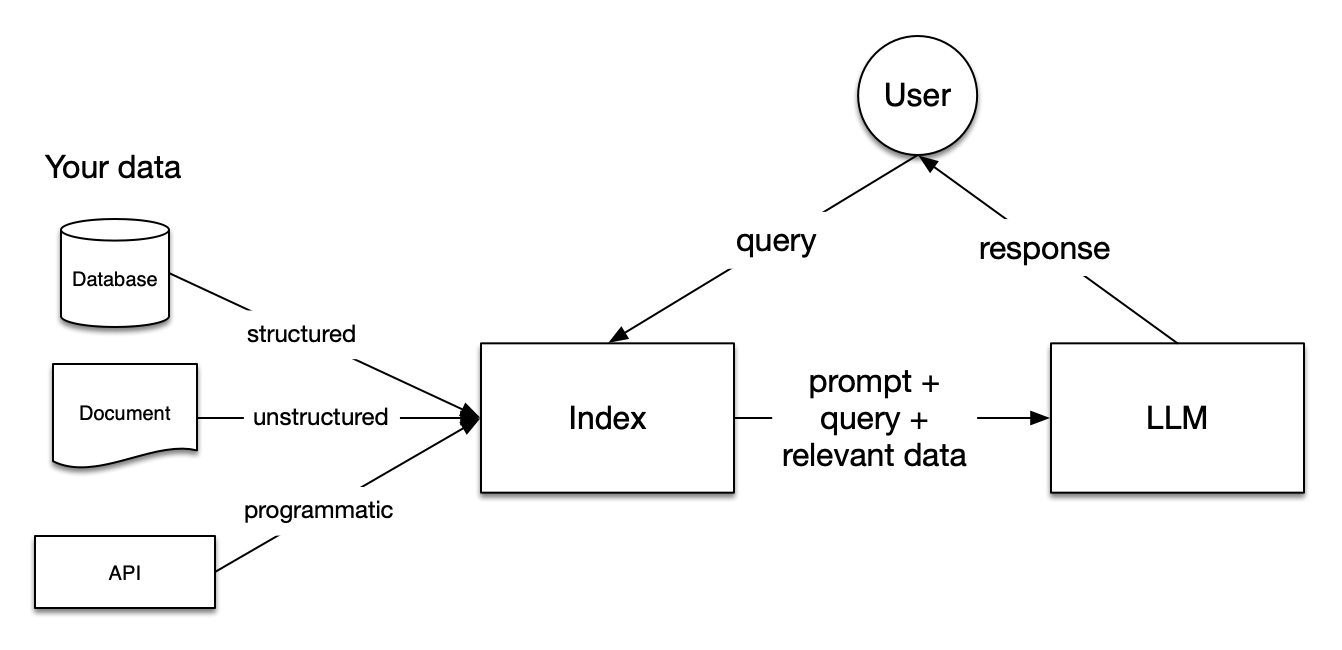

In [3]:
Image(filename='basic_rag.png')

### Stages within RAG

There are five key stages within RAG, which in turn will be a part of most larger applications you build:
- **Loading**: this refers to getting your data from where it lives -- whether it's text files, PDFs, another website, a database, or an API -- into your workflow. LlamaHub provides hundreds of connectors to choose from.
- **Indexing**: this means creating a data structure that allows for querying the data. For LLMs this nearly always means creating vector embeddings, numerical representations of the meaning of your data, as well as numerous other metadata strategies to make it easy to accurately find contextually relevant data.
- **Storing**: once your data is indexed you will almost always want to store your index, as well as other metadata, to avoid having to re-index it.
- **Querying**: for any given indexing strategy there are many ways you can utilize LLMs and LlamaIndex data structures to query, including sub-queries, multi-step queries and hybrid strategies.
- **Evaluation**: a critical step in any flow is checking how effective it is relative to other strategies, or when you make changes. Evaluation provides objective measures of how accurate, faithful and fast your responses to queries are.

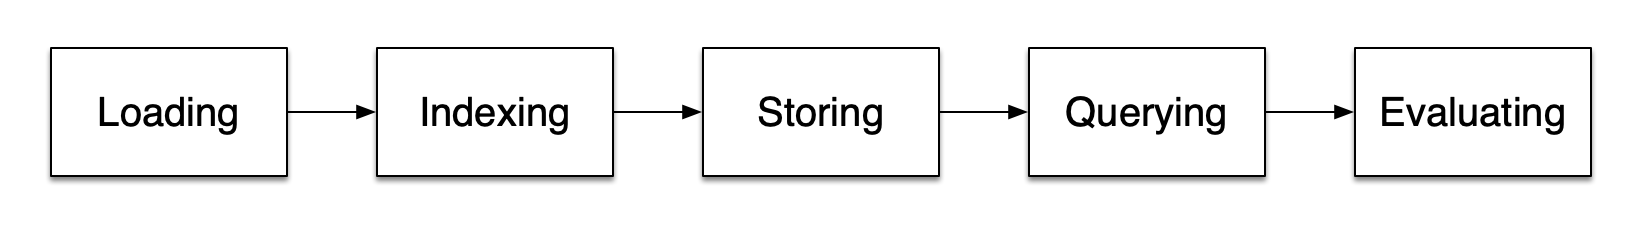

In [4]:
Image(filename='stages.png')

### Important concepts within RAG

There are also some terms you'll encounter that refer to steps within each of these stages.

#### Loading stage
- **Nodes and Documents**: A Document is a container around any data source - for instance, a PDF, an API output, or retrieve data from a database. A Node is the atomic unit of data in LlamaIndex and represents a "chunk" of a source Document. Nodes have metadata that relate them to the document they are in and to other nodes.
- **Connectors**: A data connector (often called a Reader) ingests data from different data sources and data formats into Documents and Nodes.
#### Indexing Stage
- **Indexes**: Once you've ingested your data, LlamaIndex will help you index the data into a structure that's easy to retrieve. This usually involves generating vector embeddings which are stored in a specialized database called a vector store. Indexes can also store a variety of metadata about your data.
- **Embeddings**: LLMs generate numerical representations of data called embeddings. When filtering your data for relevance, LlamaIndex will convert queries into embeddings, and your vector store will find data that is numerically similar to the embedding of your query.

#### Querying Stage
- **Retrievers**: A retriever defines how to efficiently retrieve relevant context from an index when given a query. Your retrieval strategy is key to the relevancy of the data retrieved and the efficiency with which it's done.
- **Routers**: A router determines which retriever will be used to retrieve relevant context from the knowledge base. More specifically, the RouterRetriever class, is responsible for selecting one or multiple candidate retrievers to execute a query. They use a selector to choose the best option based on each candidate's metadata and the query.
- **Node Postprocessors**: A node postprocessor takes in a set of retrieved nodes and applies transformations, filtering, or re-ranking logic to them.
- **Response Synthesizers**: A response synthesizer generates a response from an LLM, using a user query and a given set of retrieved text chunks.

## Loading Data (Ingestion)

### Loaders

#### Loading using SimpleDirectoryReader

In [5]:
from llama_index.core import SimpleDirectoryReader

documents = SimpleDirectoryReader("./data").load_data()

In [6]:
print(type(documents))
print(len(documents))

<class 'list'>
2


#### Using Readers from LlamaHub

In [7]:
# %pip install llama-index-readers-database

In [8]:
import os
from llama_index.core import download_loader

from llama_index.readers.database import DatabaseReader

# reader = DatabaseReader(
#     scheme=os.getenv("DB_SCHEME"),
#     host=os.getenv("DB_HOST"),
#     port=os.getenv("DB_PORT"),
#     user=os.getenv("DB_USER"),
#     password=os.getenv("DB_PASS"),
#     dbname=os.getenv("DB_NAME"),
# )

# query = "SELECT * FROM users"
# documents = reader.load_data(query=query)

#### Creating Documents directly

In [9]:
from llama_index.core import Document

doc = Document(text="text")

In [10]:
print(type(doc))
print(doc)
doc

<class 'llama_index.core.schema.Document'>
Doc ID: d4cf489f-b01e-4e74-b986-b5b865699abf
Text: text


Document(id_='d4cf489f-b01e-4e74-b986-b5b865699abf', embedding=None, metadata={}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text_resource=MediaResource(embeddings=None, data=None, text='text', path=None, url=None, mimetype=None), image_resource=None, audio_resource=None, video_resource=None, text_template='{metadata_str}\n\n{content}')

### Transformations

#### High-Level Transformation API

In [12]:
from llama_index.core import VectorStoreIndex

vector_index = VectorStoreIndex.from_documents(documents)
vector_index.as_query_engine()

In [13]:
from llama_index.core.node_parser import SentenceSplitter

text_splitter = SentenceSplitter(chunk_size=512, chunk_overlap=10)

# global
from llama_index.core import Settings

Settings.text_splitter = text_splitter

# per-index
index = VectorStoreIndex.from_documents(
    documents, transformations=[text_splitter]
)

In [14]:
index.as_query_engine()

#### Lower-Level Transformation API

##### Splitting Your Documents into Nodes

In [29]:
# from llama_index.core import SimpleDirectoryReader
# from llama_index.core.ingestion import IngestionPipeline
# from llama_index.core.node_parser import TokenTextSplitter

# documents = SimpleDirectoryReader("./data").load_data()

# pipeline = IngestionPipeline(transformations=[TokenTextSplitter(), ...])

# nodes = pipeline.run(documents=documents)

In [30]:
from llama_index.core import Document

documents=[Document.example()]

print(len(documents))
print(type(documents[0]))
print(documents[0].text)

1
<class 'llama_index.core.schema.Document'>

Context
LLMs are a phenomenal piece of technology for knowledge generation and reasoning.
They are pre-trained on large amounts of publicly available data.
How do we best augment LLMs with our own private data?
We need a comprehensive toolkit to help perform this data augmentation for LLMs.

Proposed Solution
That's where LlamaIndex comes in. LlamaIndex is a "data framework" to help
you build LLM  apps. It provides the following tools:

Offers data connectors to ingest your existing data sources and data formats
(APIs, PDFs, docs, SQL, etc.)
Provides ways to structure your data (indices, graphs) so that this data can be
easily used with LLMs.
Provides an advanced retrieval/query interface over your data:
Feed in any LLM input prompt, get back retrieved context and knowledge-augmented output.
Allows easy integrations with your outer application framework
(e.g. with LangChain, Flask, Docker, ChatGPT, anything else).
LlamaIndex provides tools 

In [31]:
# from llama_index.core import Document
# from llama_index.embeddings.openai import OpenAIEmbedding
# from llama_index.core.node_parser import SentenceSplitter
# from llama_index.core.extractors import TitleExtractor
# from llama_index.core.ingestion import IngestionPipeline, IngestionCache

# # create the pipeline with transformations
# pipeline = IngestionPipeline(
#     transformations=[
#         SentenceSplitter(chunk_size=25, chunk_overlap=0),
#         TitleExtractor(),
#         OpenAIEmbedding(),
#     ]
# )

# # run the pipeline
# nodes = pipeline.run(documents=[Document.example()])

import nest_asyncio
nest_asyncio.apply()

from llama_index.core import Document
from llama_index.embeddings.openai import OpenAIEmbedding
from llama_index.core.node_parser import SentenceSplitter
from llama_index.core.extractors import TitleExtractor
from llama_index.core.ingestion import IngestionPipeline, IngestionCache

# create the pipeline with transformations
pipeline = IngestionPipeline(
    transformations=[
        SentenceSplitter(chunk_size=25, chunk_overlap=0),
        TitleExtractor(),
        OpenAIEmbedding(),
    ]
)

# run the pipeline
nodes = pipeline.run(documents=[Document.example()])

Metadata length (9) is close to chunk size (25). Resulting chunks are less than 50 tokens. Consider increasing the chunk size or decreasing the size of your metadata to avoid this.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  2.97it/s]


In [34]:
print(type(nodes))
print(len(nodes))
print(nodes[0])

<class 'list'>
19
Node ID: 27ce3c68-8982-45a9-8c0e-e3fcf5c7b47a
Text: Context LLMs are a phenomenal piece of technology for knowledge
generation and


#### Adding Metadata

In [36]:
document = Document(
    text="text",
    metadata={"filename": "<doc_file_name>", "category": "<category>"},
)

In [37]:
document

Document(id_='7eb5cfba-a31f-47ce-aa39-529e06eec34b', embedding=None, metadata={'filename': '<doc_file_name>', 'category': '<category>'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text_resource=MediaResource(embeddings=None, data=None, text='text', path=None, url=None, mimetype=None), image_resource=None, audio_resource=None, video_resource=None, text_template='{metadata_str}\n\n{content}')

#### Adding Embeddings

#### Creating and passing Nodes directly

In [38]:
from llama_index.core.schema import TextNode

node1 = TextNode(text="<text_chunk>", id_="<node_id>")
node2 = TextNode(text="<text_chunk>", id_="<node_id>")

index = VectorStoreIndex([node1, node2])

In [41]:
print(type(index))
print(index)
# print(len(nodes))
# print(nodes[0])

<class 'llama_index.core.indices.vector_store.base.VectorStoreIndex'>


##### ADDED

In [44]:
from llama_index.core import Document
from IPython.display import Markdown, display

# documents=[Document.example()]
document=Document.example()

node1 = TextNode(text=document.text, id_="<node_01>")
node2 = TextNode(text=document.text, id_="<node_02>")

index = VectorStoreIndex([node1, node2])

query_engine = index.as_query_engine()

In [45]:
response = query_engine.query("What is the document about?")
display(Markdown(f"<b>{response}</b>"))

<b>The document is about LlamaIndex, a data framework designed to help users augment Large Language Models (LLMs) with their own private data. It provides tools for ingesting various data sources, structuring data for LLMs, querying data, and integrating with different application frameworks. The framework caters to both beginner and advanced users, offering high-level APIs for easy data ingestion and querying, as well as lower-level APIs for customization and extension of different modules to suit individual needs.</b>

In [47]:
response.metadata

{'<node_01>': {}}

## LlamaHub
- https://llamahub.ai/

### Usage Pattern

In [49]:
# %pip install llama-index-readers-google

In [50]:
# from llama_index.core import download_loader

# from llama_index.readers.google import GoogleDocsReader

# loader = GoogleDocsReader()
# documents = loader.load_data(document_ids=[...])

### Built-in connector: SimpleDirectoryReader

In [51]:
from llama_index.core import SimpleDirectoryReader

documents = SimpleDirectoryReader("./data").load_data()

### Available connectors

Hundreds of available connectors, including:
- **Notion** (NotionPageReader)
- **Google Docs** (GoogleDocsReader)
- **Slack** (SlackReader)
- **Discord** (DiscordReader)
- **Apify Actors** (ApifyActor).<br>
  Can crawl the web, scrape webpages, extract text content, download files including .pdf, .jpg, .png, .docx, etc.

## Loading from LlamaCloud
- https://cloud.llamaindex.ai/

### Using LlamaCloud from LlamaIndex

In [54]:
import os
from llama_index.indices.managed.llama_cloud import LlamaCloudIndex

# os.environ["LLAMA_CLOUD_API_KEY"] = "llx-..."

# index = LlamaCloudIndex("my_first_index", project_name="Default")
# query_engine = index.as_query_engine()
# answer = query_engine.query("Example query")

## Indexing & Embedding

### What is an Index?

### Vector Store Index

#### What is an embedding?

#### Vector Store Index embeds your documents

#### Top K Retrieval

#### Using Vector Store Index

In [64]:
from llama_index.core import VectorStoreIndex

index = VectorStoreIndex.from_documents(documents)

In [65]:
print(len(documents))
print(type(documents[0]))
print(type(index))

2
<class 'llama_index.core.schema.Document'>
<class 'llama_index.core.indices.vector_store.base.VectorStoreIndex'>


In [66]:
from llama_index.core import VectorStoreIndex

index = VectorStoreIndex(nodes)

In [67]:
print(len(nodes))
print(type(nodes[0]))

19
<class 'llama_index.core.schema.TextNode'>


### Summary Index

### Further Reading